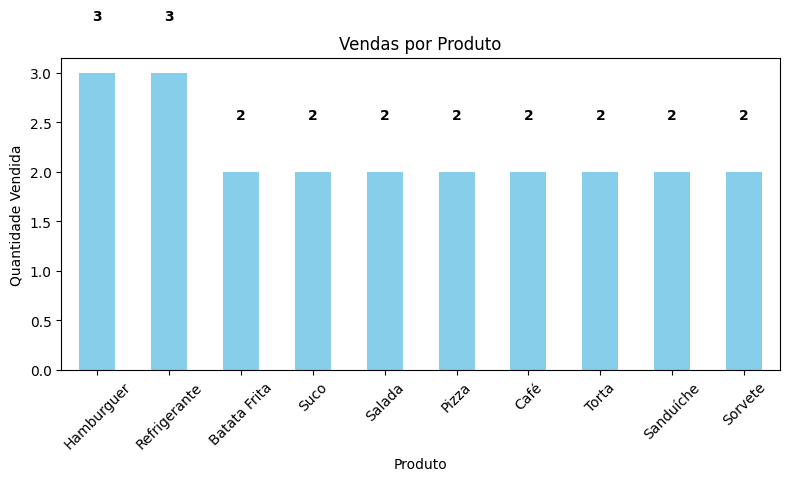

In [36]:
# Gráfico de vendas por produto
# Este gráfico mostra a quantidade total vendida de cada produto, permitindo identificar os itens mais populares.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

vendas = pd.read_csv('../dados/vendas.csv')
quantidades = vendas['produto'].value_counts()
plt.figure(figsize=(8,5))
ax = quantidades.plot(kind='bar', color='skyblue')
plt.title('Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
for i, v in enumerate(quantidades.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Gráfico de participação de cada produto nas vendas
Este gráfico de pizza mostra a proporção de vendas de cada produto, facilitando a visualização da participação de cada item no total vendido.

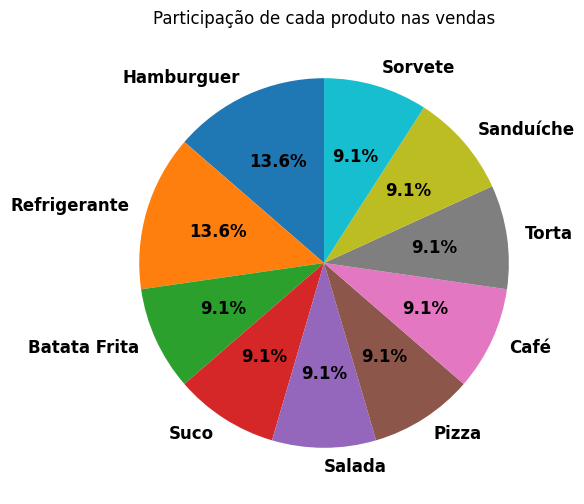

In [37]:
# Gráfico de pizza da participação de cada produto nas vendas
# Mostra a proporção de vendas de cada produto no total vendido.
quantidades = vendas['produto'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(quantidades, labels=quantidades.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Participação de cada produto nas vendas')
plt.show()

# Gráfico de faturamento por produto
Este gráfico mostra o total faturado por cada produto, permitindo identificar os itens que geram mais receita para o negócio.

C:\Users\miria\AppData\Local\Temp\ipykernel_3748\2322628258.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faturamento_produto = vendas.groupby('produto').apply(lambda x: (x['quantidade']*x['preco_unitario']).sum())
C:\Users\miria\AppData\Local\Temp\ipykernel_3748\2322628258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faturamento_produto.index, y=faturamento_produto.values, palette='viridis')


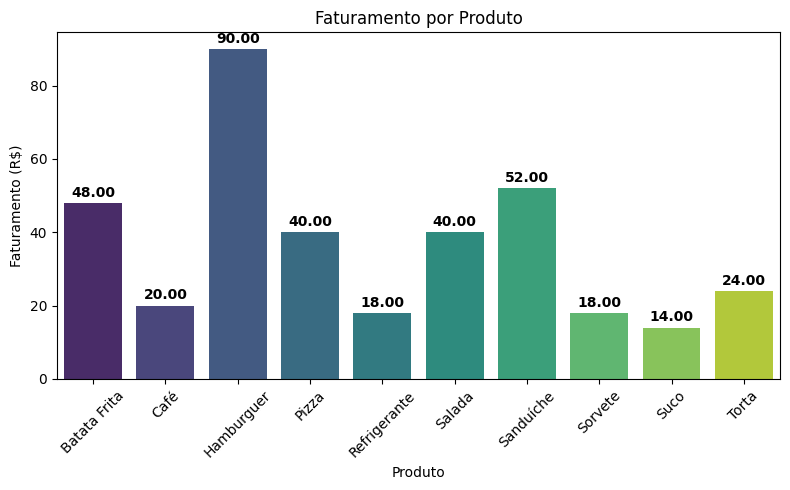

In [38]:
# Gráfico de faturamento por produto
faturamento_produto = vendas.groupby('produto').apply(lambda x: (x['quantidade']*x['preco_unitario']).sum())
plt.figure(figsize=(8,5))
ax = sns.barplot(x=faturamento_produto.index, y=faturamento_produto.values, palette='viridis')
plt.title('Faturamento por Produto')
plt.xlabel('Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
for i, v in enumerate(faturamento_produto.values):
    ax.text(i, v + max(faturamento_produto.values)*0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Gráfico de evolução das vendas mensais
Este gráfico mostra como as vendas evoluíram ao longo dos meses, permitindo identificar tendências, sazonalidades e períodos de pico.

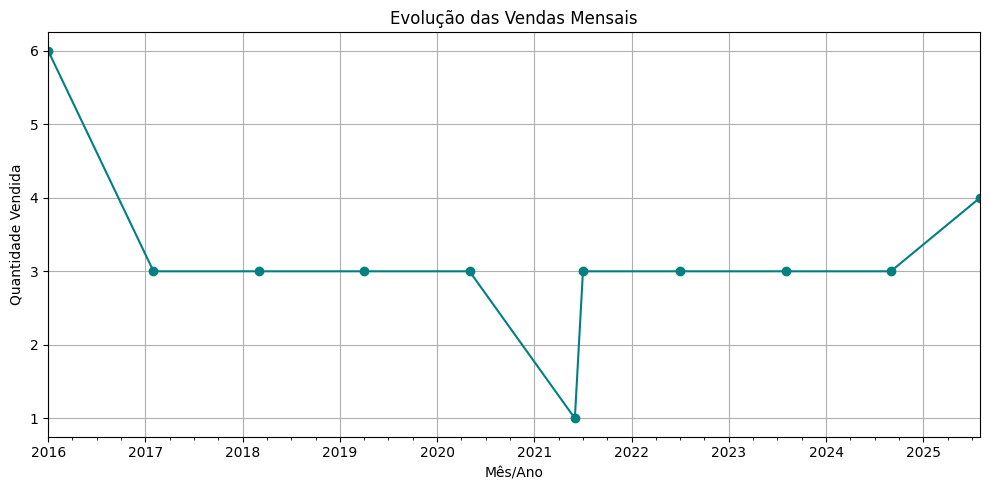

In [39]:
# Gráfico de evolução das vendas mensais
vendas['data'] = pd.to_datetime(vendas['data'])
vendas_por_mes = vendas.groupby(vendas['data'].dt.to_period('M')).quantidade.sum()
plt.figure(figsize=(10,5))
ax = vendas_por_mes.plot(kind='line', marker='o', color='teal')
plt.title('Evolução das Vendas Mensais')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
for i, v in enumerate(vendas_por_mes.values):
    ax.annotate(str(v), (i, v), textcoords="offset points", xytext=(0,8), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Análise de Gestão de Estoque e Custo de Fabricação
Nesta seção, vamos analisar o estoque dos produtos e calcular o custo de fabricação de cada item, considerando insumos e despesas.

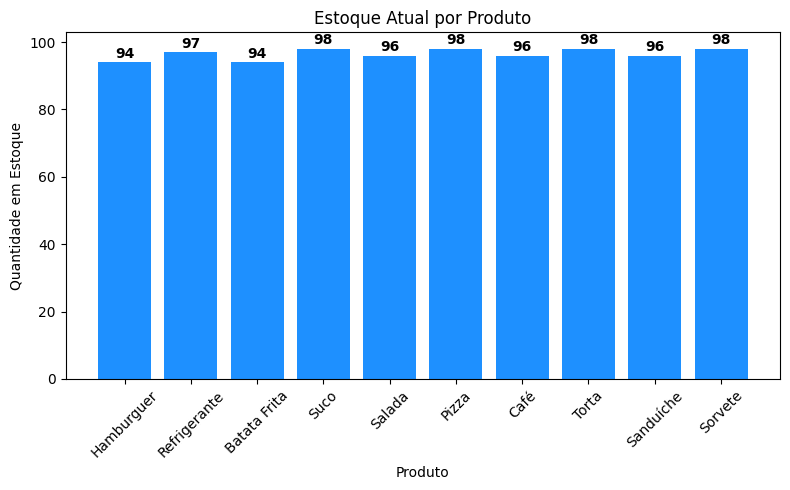

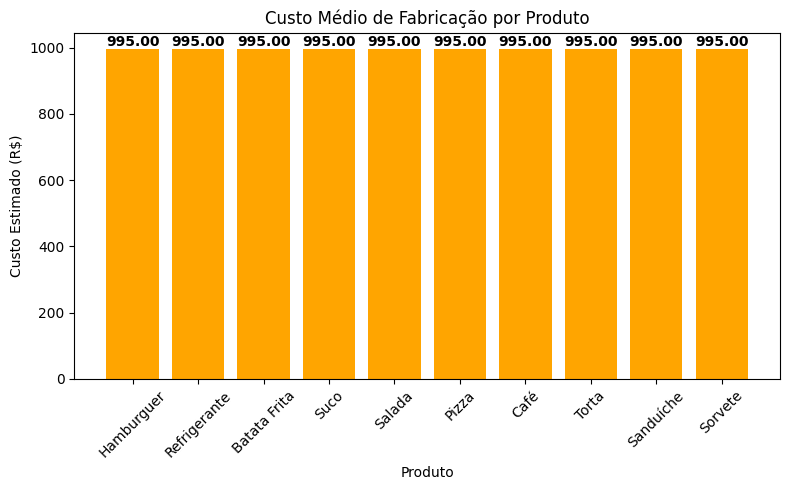

In [40]:
# Análise de estoque e custo de fabricação dos produtos
# Exemplo: calcular estoque atual e custo estimado de cada produto
produtos = pd.read_csv('../dados/produtos.csv')
vendas = pd.read_csv('../dados/vendas.csv')

# Simulação de estoque inicial (pode ser ajustado conforme o contexto)
estoque_inicial = 100
estoque_produto = {}
for produto in produtos['produto']:
    vendido = vendas[vendas['produto'] == produto]['quantidade'].sum()
    estoque_produto[produto] = estoque_inicial - vendido

# Simulação de custo de fabricação (usando insumos e despesas médias)
despesas = pd.read_csv('../dados/despesas.csv')
custo_medio_insumos = despesas[despesas['despesa_tipo'] == 'Insumos']['valor'].mean()
custo_fabricacao = {produto: custo_medio_insumos for produto in produtos['produto']}

# Visualização do estoque
plt.figure(figsize=(8,5))
ax = plt.bar(estoque_produto.keys(), estoque_produto.values(), color='dodgerblue')
plt.title('Estoque Atual por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade em Estoque')
plt.xticks(rotation=45)
for i, v in enumerate(estoque_produto.values()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Visualização do custo de fabricação
plt.figure(figsize=(8,5))
ax = plt.bar(custo_fabricacao.keys(), custo_fabricacao.values(), color='orange')
plt.title('Custo Médio de Fabricação por Produto')
plt.xlabel('Produto')
plt.ylabel('Custo Estimado (R$)')
plt.xticks(rotation=45)
for i, v in enumerate(custo_fabricacao.values()):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Análise dos Insumos Utilizados na Fabricação dos Produtos
Esta análise mostra quais insumos são mais utilizados na produção dos itens da lanchonete, ajudando a identificar os principais custos e demandas de estoque.

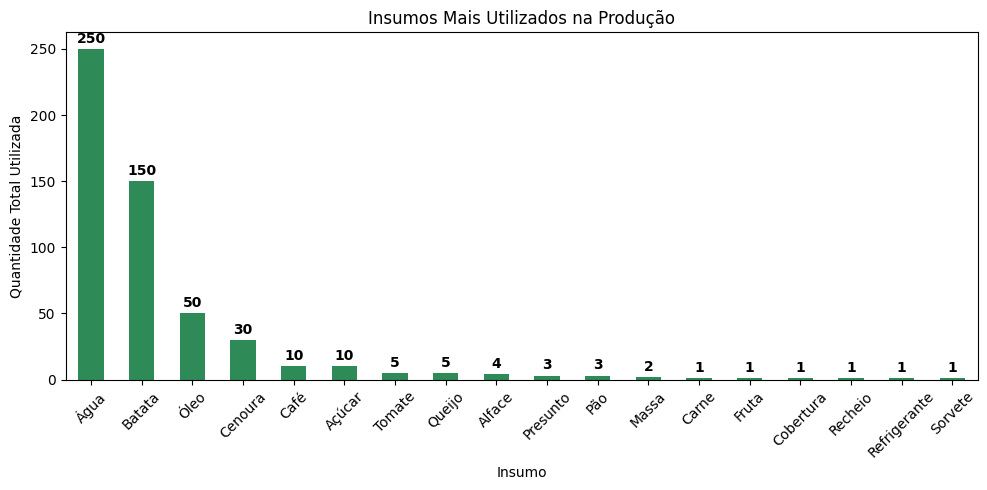

In [41]:
# Análise dos insumos mais utilizados na fabricação dos produtos
insumos = pd.read_csv('../dados/insumos_produtos.csv')
insumos_agrupados = insumos.groupby('insumo')['quantidade_insumo'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
ax = insumos_agrupados.plot(kind='bar', color='seagreen')
plt.title('Insumos Mais Utilizados na Produção')
plt.xlabel('Insumo')
plt.ylabel('Quantidade Total Utilizada')
plt.xticks(rotation=45)
for i, v in enumerate(insumos_agrupados.values):
    ax.text(i, v + max(insumos_agrupados.values)*0.01, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Análise de Vendas por Dia da Semana e Ticket Médio
Aqui vamos identificar os dias de maior movimento e calcular o ticket médio das vendas, ajudando a planejar promoções e estratégias de atendimento.

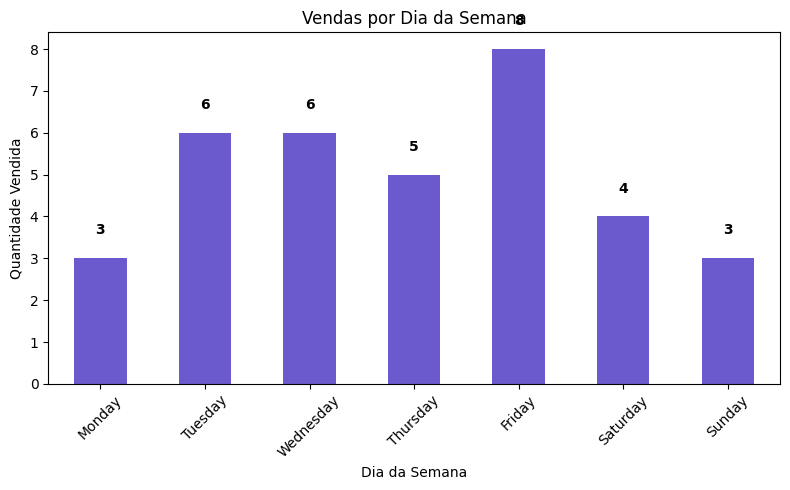

Ticket médio das vendas: R$ 16.55


In [42]:
# Análise de vendas por dia da semana e ticket médio
vendas['data'] = pd.to_datetime(vendas['data'])
vendas['dia_semana'] = vendas['data'].dt.day_name()
vendas['faturamento'] = vendas['quantidade'] * vendas['preco_unitario']

# Vendas totais por dia da semana
vendas_semana = vendas.groupby('dia_semana')['quantidade'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,5))
ax = vendas_semana.plot(kind='bar', color='slateblue')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
for i, v in enumerate(vendas_semana.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Ticket médio por venda
ticket_medio = vendas['faturamento'].mean()
print(f'Ticket médio das vendas: R$ {ticket_medio:.2f}')

## Comparativo: Despesas vs Receitas
Agora vamos comparar a evolução das despesas e receitas ao longo do tempo para avaliar a saúde financeira do negócio.

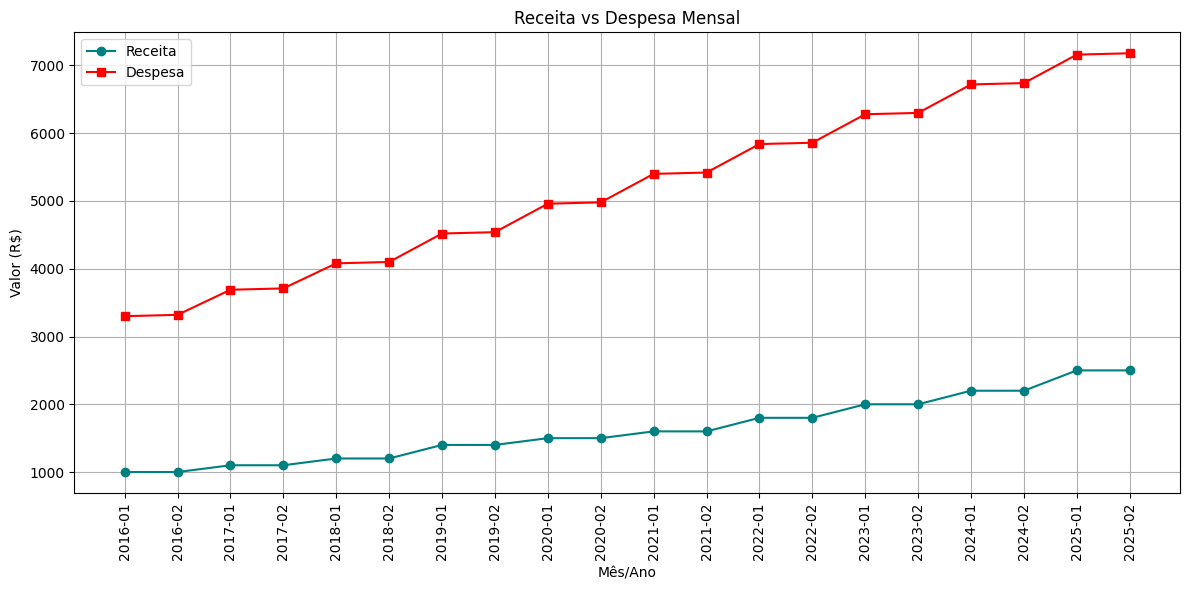

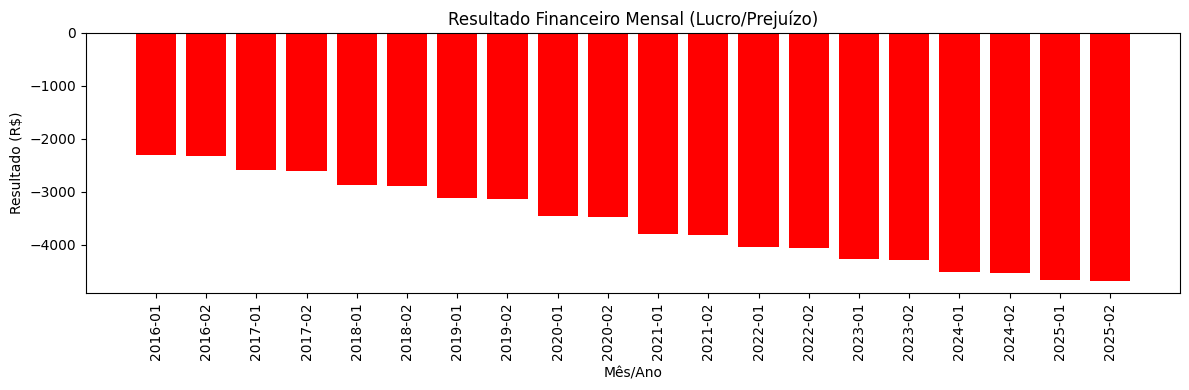

In [43]:
# Comparativo de Despesas vs Receitas ao longo do tempo
faturamento_mensal = pd.read_csv('../dados/faturamento_mensal.csv')
despesas = pd.read_csv('../dados/despesas.csv')

# Preparar dados mensais
faturamento_mensal['mes'] = faturamento_mensal['mes'].astype(str)
despesas['data'] = pd.to_datetime(despesas['data'])
despesas['ano_mes'] = despesas['data'].dt.strftime('%Y-%m')
despesas_mensal = despesas.groupby('ano_mes')['valor'].sum().reset_index()

# Unir receitas e despesas
comparativo = pd.DataFrame()
comparativo['mes'] = faturamento_mensal['ano'].astype(str) + '-' + faturamento_mensal['mes'].str.zfill(2)
comparativo['receita'] = faturamento_mensal['receita']
comparativo = comparativo.merge(despesas_mensal, left_on='mes', right_on='ano_mes', how='left')
comparativo = comparativo.fillna(0)
comparativo = comparativo.sort_values('mes')

plt.figure(figsize=(12,6))
plt.plot(comparativo['mes'], comparativo['receita'], label='Receita', marker='o', color='teal')
plt.plot(comparativo['mes'], comparativo['valor'], label='Despesa', marker='s', color='red')
plt.title('Receita vs Despesa Mensal')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultado financeiro mensal
comparativo['resultado'] = comparativo['receita'] - comparativo['valor']
plt.figure(figsize=(12,4))
plt.bar(comparativo['mes'], comparativo['resultado'], color=['green' if x>=0 else 'red' for x in comparativo['resultado']])
plt.title('Resultado Financeiro Mensal (Lucro/Prejuízo)')
plt.xlabel('Mês/Ano')
plt.ylabel('Resultado (R$)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()